<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/AS_2020_AirBnB_losning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anvendt Statistik Eksamen
## HA - E2020


I dag skal vi analysere AirBnB udlejning i København. Hvor ligger de dyreste steder? Hvem er de professionelle værter, der driver husleje op i hvoedstaden og hvilke faktorer har potentielt indflydelse på priserne på platformen?

![](https://source.unsplash.com/fEJ6x-OnfXo)

Notebook'en guider dig igennem opgaven. Priser fortolkes i DKK (selvom der ses $ i data grundet scraping fejl)

Dataset er baseret på datasæt fra http://insideairbnb.com/
opdateret Juni 2020.

## 1. EDA - Beskrivende statistik
I den første del af opgaven skal i indlæse data og give et indledende overblik over indholdet i det givne AirBnB datasæt. 

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

Data kan findes på digital eksamen, moodle (csv.gz filer og på GitHub)

* data airbnb: `https://sds-aau.github.io/IntroStat/Data/airbnb.csv.gz`
* data cykelstativer: `https://sds-aau.github.io/IntroStat/Data/cykel.csv.gz`

**der bruges gzip komprimering**

In [ ]:
# Indlæs data
df = pd.read_csv('https://sds-aau.github.io/IntroStat/Data/airbnb.csv.gz', compression='gzip')

In [ ]:
# Giv et overblik over variable og videre information i datasættet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28523 entries, 0 to 28522
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28523 non-null  int64  
 1   name                            28466 non-null  object 
 2   host_id                         28523 non-null  int64  
 3   host_name                       28511 non-null  object 
 4   host_since                      28512 non-null  object 
 5   host_location                   28430 non-null  object 
 6   host_acceptance_rate            16076 non-null  object 
 7   host_is_superhost               28512 non-null  object 
 8   host_listings_count             28512 non-null  float64
 9   street                          28523 non-null  object 
 10  neighbourhood                   28523 non-null  object 
 11  neighbourhood_cleansed          28523 non-null  object 
 12  city                            

In [ ]:
# Vis hvilke variable der har manglende værdier
df.isnull().sum()

id                                    0
name                                 57
host_id                               0
host_name                            12
host_since                           11
host_location                        93
host_acceptance_rate              12447
host_is_superhost                    11
host_listings_count                  11
street                                0
neighbourhood                         0
neighbourhood_cleansed                0
city                                 13
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            12
bedrooms                             29
beds                                103
bed_type                              0
amenities                             0
square_feet                       28130
price                                 0
security_deposit                  13845
cleaning_fee                       8968


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [ ]:
#Drop variable alle host_ variable på nær host_id (den skal bruges til analyse)
#Drop også "neighbourhood", "city", 'square_feet'

# du kan bruge df.columns komando for nemmere copy-paste af variablenavne 


df.drop(['host_name', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'neighbourhood', 'city','square_feet'], axis = 'columns', inplace=True)

In [ ]:
# Vis datasættets 5 første rækker
df.head()

,id,name,host_id,street,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,6983,Copenhagen 'N Livin',16774,"Copenhagen, Hovedstaden, Denmark",Nrrebro,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$365.00,$0.00,$33.00,2,15,168,96.0,moderate,1,1.28
1,26057,Lovely house - most attractive area,109777,"Copenhagen, Hovedstaden, Denmark",Indre By,House,Entire home/apt,6,1.5,4.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Indoor fireplace"",Heating,""F...","$2,398.00","$5,000.00","$1,100.00",3,30,50,98.0,moderate,1,0.62
2,26473,City Centre Townhouse Sleeps 1-12 persons,112210,"Copenhagen, Hovedstaden, Denmark",Indre By,House,Entire home/apt,12,2.5,6.0,7.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...","$3,096.00","$3,726.00",$522.00,3,31,293,91.0,moderate,1,2.48
3,29118,Best Location in Cool Istedgade,125230,"Copenhagen, Hovedstaden, Denmark",Vesterbro-Kongens Enghave,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",$797.00,NaN,$300.00,7,14,22,98.0,strict_14_with_grace_period,1,0.18
4,29618,Artsy and familyfriendly home in lovely Copenh...,127577,"Copenhagen, Hovedstaden, Denmark",sterbro,Apartment,Entire home/apt,4,1.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",$857.00,NaN,$75.00,7,31,90,94.0,moderate,1,0.75


## 2. Rengøring og rensning af data

In [ ]:
# Udsmid manglende værdier i variable hvor der mangler op til og med 103 observationer 
# dvs. variable med flere manglende observationer end 103 skal ikke renses for manglende observationer

df.dropna(subset=['name', 'bathrooms', 'bedrooms', 'beds'], inplace=True)

In [ ]:
# Her omdannes "price" til en float (numerisk variabel) og får fjernet "$" og "," - det har vi gjort for jer.
df.price = df.price.replace('[\$,]', '', regex=True).astype(float)

## 3. Frekvensberegninger 

In [ ]:
# Hvor mange AirBnB værelser/lejligheder findes i de forskellige bydele? - "neighbourhood_cleansed"
# Hvilken bydel har flest udbudte værelser/lejligheder? 
df.neighbourhood_cleansed.value_counts()

Nrrebro                      5135
Vesterbro-Kongens Enghave    4428
Indre By                     3770
Frederiksberg                3329
sterbro                      2980
Amager Vest                  2556
Amager st                    2156
Bispebjerg                   1439
Valby                        1224
Vanlse                        777
Brnshj-Husum                  542
Name: neighbourhood_cleansed, dtype: int64

SVAR: Nørrebro har de fleste...

In [ ]:
# Beskriv frekvensfordelinger for "price" variablen (min, max, mean, std.afv.)
df.price.describe()

count    28336.000000
mean       850.099944
std       1067.952048
min          0.000000
25%        498.000000
50%        698.000000
75%        996.000000
max      69175.000000
Name: price, dtype: float64

Fortolk beskrivende statistikker af variablen. Hvad for en fordeling ses der? Hvordan kan man muligvis forklare maksimalværdien?



In [ ]:
# Med udgangspunkt i "price", beskær datasættet til 95. percentil (95 inkl.)
df = df[df.price <= df.price.quantile(.95)]

In [ ]:
# Tjek maxprisen for en AirBnB lejlighed efter subsetting. 
df.price.max()

1701.0

In [ ]:
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


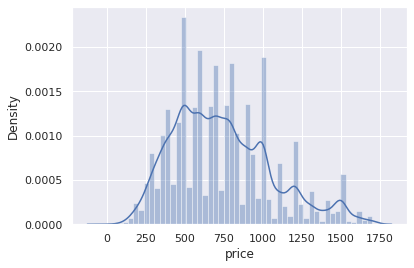

In [ ]:
# Lav et histogram over prisfordelingen
sns.distplot(df.price)

Hvordan er fordelingen nu (venstreskæv, højreskæv, normaltfordelt? - kan man sige det bare ved at analysere visuelt?) 

In [ ]:
# Vis den gennemsnitlige "price" grupperet på "neighbourhood_cleansed" 
# Hvilket nabolag er det dyreste?  
df.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)

neighbourhood_cleansed
Indre By                     930.789124
Amager Vest                  782.932410
Vesterbro-Kongens Enghave    774.199581
Frederiksberg                758.407268
sterbro                      746.573701
Nrrebro                      681.047026
Amager st                    679.906280
Brnshj-Husum                 657.954459
Valby                        636.997492
Vanlse                       618.809211
Bispebjerg                   545.411806
Name: price, dtype: float64

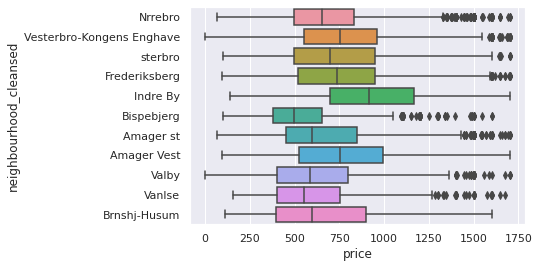

In [ ]:
# lav et boxplot over den gennemsnitlige "price" fordelt på nabolag

sns.boxplot(data = df, x = "price", y = "neighbourhood_cleansed")

In [ ]:
# Lav en optælling af observationer for de forskellige typer af boliger - "property_type"
df.property_type.value_counts()

Apartment                 22859
Condominium                1596
House                      1221
Townhouse                   471
Serviced apartment          286
Loft                        194
Villa                       149
Guesthouse                   23
Guest suite                  21
Bungalow                     20
Bed and breakfast            19
Boat                         18
Hostel                       16
Houseboat                    16
Other                        13
Hotel                        11
Tiny house                   11
Cabin                        10
Cottage                       4
Boutique hotel                3
Hut                           3
Lighthouse                    1
Casa particular (Cuba)        1
Tent                          1
Island                        1
Camper/RV                     1
Barn                          1
Earth house                   1
Name: property_type, dtype: int64

In [ ]:
# filrer data, således der kun beholdes observationer af de 3 hyppigste kategorier
# her bruger vi "isin" komando for at definere tilladte kategorier

df = df[df.property_type.isin(['Apartment', 'Condominium', 'House'])]

In [ ]:
# Lav en optælling af observationer for de forskellige typer af værelser - "room_type"
df.room_type.value_counts()

Entire home/apt    21554
Private room        4056
Name: room_type, dtype: int64

In [ ]:
# fortag den samme filtrering for "room_type", hvor der kun beholdes de 2 hyppigste kategorier
df = df[df.room_type.isin(['Entire home/apt', 'Private room'])]

In [ ]:
# Hvad er den bydel med den højeste andel af huse ('House') på platformen? Brug pd.crosstab og normaliseing 
# (columns eller index lige efter den rækkefølge som du indlæser dine variable)

pd.crosstab(df.neighbourhood_cleansed, df.property_type, normalize='index')

property_type,Apartment,Condominium,House
neighbourhood_cleansed,,,
Amager Vest,0.812726,0.067690,0.119585
Amager st,0.830160,0.078744,0.091096
Bispebjerg,0.895040,0.056794,0.048167
Brnshj-Husum,0.490066,0.052980,0.456954
Frederiksberg,0.909002,0.073773,0.017225
Indre By,0.926142,0.062865,0.010993
Nrrebro,0.948537,0.050252,0.001211
Valby,0.773551,0.054348,0.172101
Vanlse,0.714286,0.064935,0.220779


In [ ]:
# Brug crosstab igen til at finde gennemsnitlige priser (defineres som values og aggfunc - 
# læs documentation for funktionen) opdelt på bydele og hustyper)

pd.crosstab(df.neighbourhood_cleansed, df.property_type, values=df.price, aggfunc='mean')

property_type,Apartment,Condominium,House
neighbourhood_cleansed,,,
Amager Vest,740.478623,805.093333,916.083019
Amager st,629.964662,674.359477,950.898305
Bispebjerg,522.790361,563.721519,850.805970
Brnshj-Husum,495.301802,507.333333,842.512077
Frederiksberg,741.645334,801.361233,1034.754717
Indre By,916.114243,984.278689,998.687500
Nrrebro,679.901277,700.108434,645.500000
Valby,571.049180,610.650000,849.257895
Vanlse,536.210101,503.488889,845.686275


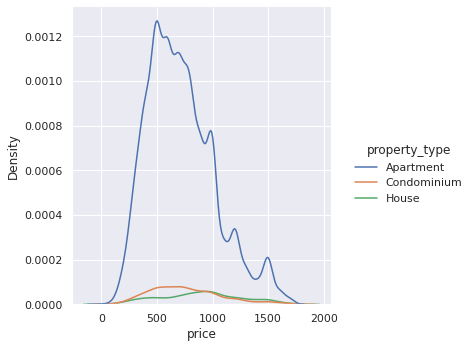

In [ ]:
# Lav en "kernel density estimation" (kde) plot
# hvor der vises en farve-opdeling på forskellige "property_type"
# brug her seaborn's displot funktionen https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

sns.displot(data = df, x='price', hue='property_type', kind='kde')

In [ ]:
#Vis den prismæssige standardafvigelse for "property_type" 
# Note: Sæt degrees of freedom til 0 (ddof=0)
df.groupby('property_type').price.std(ddof=0) 

property_type
Apartment      305.635193
Condominium    314.405448
House          354.754946
Name: price, dtype: float64

Hvordan kan standardafvigelsen og dens forskell mellem kategorierne fortolkes?


## Bivariat Analyse

Hvad korrelerer mere med pricen af et sted - antal af værelser eller hvor mange der kan sove?

In [ ]:
# price vs bedrooms

df.price.corr(df.bedrooms)

0.4669422842087915

In [ ]:
# price vs accomodates

df.price.corr(df.accommodates)

0.505960433910758

In [ ]:
# Big is beautiful: Hvor er der mest sammenhæng mellem antal af gæster (accomodates) og 
# prisen - beregn korrelation per bydel (groupby)
df.groupby('neighbourhood_cleansed').price.corr(df.accommodates)

neighbourhood_cleansed
Amager Vest                  0.555552
Amager st                    0.573149
Bispebjerg                   0.579763
Brnshj-Husum                 0.690785
Frederiksberg                0.513485
Indre By                     0.507869
Nrrebro                      0.500829
Valby                        0.634409
Vanlse                       0.601096
Vesterbro-Kongens Enghave    0.508968
sterbro                      0.529032
Name: price, dtype: float64

In [ ]:
# Ligesom med price variablen, skal "cleaning_fee" også have fjernet "$" og ",", og gøres til en float (numerisk variabel) 
df.cleaning_fee = df.cleaning_fee.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Udfyld manglende observationer i cleaning fee med 0

df.cleaning_fee.fillna(0, inplace=True)

In [ ]:
# beregn korrelationskoefficienten for "price" og "cleaning_fee" - er der en sammenhæng (hvis ja, er den stærk, moderat, svag)? Kan du fortolke det?
df.price.corr(df.cleaning_fee)

0.32253886103558993

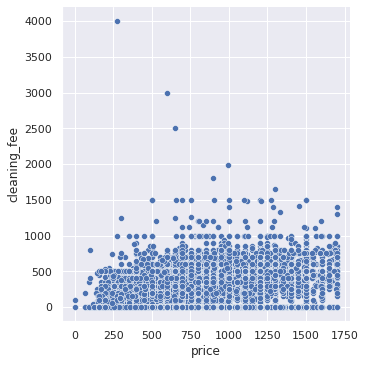

In [ ]:
# lav en plot, der visualiserer sammenhæng mellem "price" og "cleaning_fee" hvad kan du sige om outliers her?

sns.relplot(x="price", y="cleaning_fee", data=df)

In [ ]:
# Lav en ny variabel "total_price" ud fra "price" og "cleaning_fee" (sammenlæg de to værdier fra )
df['total_price'] = df.price + df.cleaning_fee

In [ ]:
# definer en dataframe hvor der kun medtages observationer med > 10 reviews "number_of_reviews"
# samlign korrelationer mellem total_price/price vs accomodates
# fortolk de to korrelationskoefficienter


high_review_df = df[df.number_of_reviews > 10]

In [ ]:
high_review_df.total_price.corr(high_review_df.accommodates)

0.5581273204888418

In [ ]:
high_review_df.price.corr(high_review_df.accommodates)

0.5312423397392466

### Datamanipulation

Du arbejder for AirBnB som analytiker med webudviklere og og bliver opfordret at lave en ny indikator på platformen, som viser hvor mange cykelstativer der er i bydelen, hvor lejligheden/værelset ligger.



In [ ]:
# Hent data fra region Hovedstaden som ligger i cykel.csv.gz og giv et kort overblik over datasæt

cykel = pd.read_csv('https://sds-aau.github.io/IntroStat/Data/cykel.csv.gz', compression='gzip')

In [ ]:
cykel.head()

,Unnamed: 0,id,stativ_type,stativ_placering,stativ_udformning,cykler_retning,antal_pladser,wkb_geometry,neighbourhood_cleansed
0,0,6450,NO,På fortovsudvidelse,Enkeltsidet,Ikke registreret,7.0,POINT (12.55991171558382 55.67131168120972),Vesterbro-Kongens Enghave
1,1,6451,NO,På fortovsudvidelse,Enkeltsidet,Ikke registreret,7.0,POINT (12.55976509434896 55.67128132114395),Vesterbro-Kongens Enghave
2,2,7176,Ikke registreret,Ikke registreret,Ikke registreret,Ikke registreret,15.0,POINT (12.55391825088484 55.67183979085195),Vesterbro-Kongens Enghave
3,3,4569,NO,På gadeareal,Enkeltsidet,Vinkelret,10.0,POINT (12.5552785558673 55.669617247673),Vesterbro-Kongens Enghave
4,4,6020,NO,På fortovsudvidelse,Enkeltsidet,Vinkelret,5.0,POINT (12.55513673158002 55.66983957166716),Vesterbro-Kongens Enghave


In [ ]:
cykel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6021 non-null   int64  
 1   id                      6021 non-null   int64  
 2   stativ_type             6021 non-null   object 
 3   stativ_placering        6021 non-null   object 
 4   stativ_udformning       6021 non-null   object 
 5   cykler_retning          6021 non-null   object 
 6   antal_pladser           6016 non-null   float64
 7   wkb_geometry            6021 non-null   object 
 8   neighbourhood_cleansed  6021 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 423.5+ KB


In [ ]:
# lav en beregning af hvor mange cykelstativer der er per bydel (definer et series objekt 'cykel_per_bydel')
# her kan der bruges groupby eller en simpel optælling

cykel_per_bydel = cykel.neighbourhood_cleansed.value_counts()

cykel_per_bydel.name = 'n_cykel_stativer'

In [ ]:
cykel_per_bydel

Indre By                     1655
sterbro                      1408
Vesterbro-Kongens Enghave     944
Nrrebro                       718
Amager Vest                   349
Amager st                     285
Valby                         222
Bispebjerg                    199
Brnshj-Husum                  107
Vanlse                        101
Frederiksberg                  33
Name: n_cykel_stativer, dtype: int64

In [ ]:
# lav en beregning af hvor mange cykel parkering pladser der er per bydel (definer et series objekt 'cykel_ppladser_bydel')
# brug her summen af antal_pladser per neighbourhood_cleansed

cykel_ppladser_bydel = cykel.groupby('neighbourhood_cleansed').antal_pladser.sum()
cykel_ppladser_bydel.name = 'n_cykel_ppladser'

In [ ]:
cykel_ppladser_bydel

neighbourhood_cleansed
Amager Vest                   3879.0
Amager st                     3392.0
Bispebjerg                    2238.0
Brnshj-Husum                  1780.0
Frederiksberg                  829.0
Indre By                     26119.0
Nrrebro                       7438.0
Valby                         3065.0
Vanlse                        1532.0
Vesterbro-Kongens Enghave    11532.0
sterbro                      13757.0
Name: n_cykel_ppladser, dtype: float64

In [ ]:
# lav en merge af vores airbnb data med cykel_per_bydel, hvor der bruges neighbourhood_cleansed 
# som nøgle. Husk at bruge left_on= parameter for dine Airbnb data og right_index=True (siden det er en merge af en DF og et Series objekt)
df = pd.merge(df, cykel_per_bydel, left_on='neighbourhood_cleansed', right_index=True)

In [ ]:
# Lav det samme for cykel_ppladser_bydel

df = pd.merge(df, cykel_ppladser_bydel, left_on='neighbourhood_cleansed', right_index=True)

In [ ]:
# Beregn korrelation mellem "n_cykel_ppladser" og "number_of_reviews"
# Kan man antage at en bedre cykelparkeringssituation i bydelen hjælper med at få flere gæster (og dermed flere reviews)?
# Husk...ingen/lav korrelation er også en mulighed :-)

df.n_cykel_ppladser.corr(df.number_of_reviews)

0.1048255101737312